<a href="https://colab.research.google.com/github/Tushar5860/Neural-style-transfer/blob/main/Neural_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

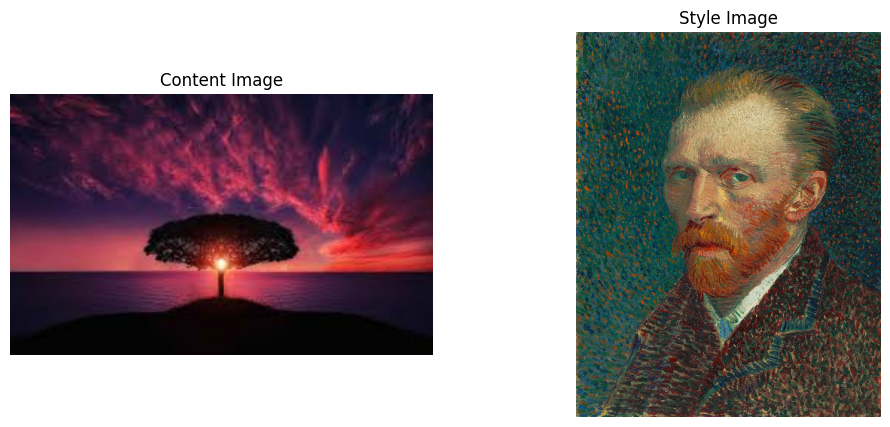

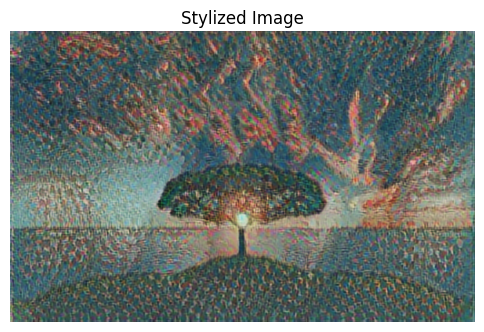

Stylized image saved at: stylized_image.jpg


In [5]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Step 1: Define function to load and preprocess images
def load_img(path_to_img, max_dim=512):
    """Load and preprocess an image."""
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)
    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

# Step 2: Define function to display images
def imshow(image, title=None):
    """Display an image."""
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
        plt.title(title)
    plt.axis('off')

# Step 3: Define function to convert tensor to image
def tensor_to_image(tensor):
    """Convert tensor to PIL Image."""
    tensor = tensor * 255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor) > 3:
        tensor = tensor[0]
    return Image.fromarray(tensor)

# Step 4: Load the style transfer model from TensorFlow Hub
def load_style_transfer_model():
    """Load the arbitrary image stylization model."""
    model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
    return model

# Step 5: Perform style transfer
def style_transfer(content_image, style_image, model):
    """Apply style transfer using the model."""
    stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]
    return stylized_image

# Step 6: Save the output image
def save_image(image, output_path):
    """Save the generated image."""
    result_image = tensor_to_image(image)
    result_image.save(output_path)

# Step 7: Main function to run the style transfer
def run_style_transfer(content_path, style_path, output_path, max_dim=512):
    """Run the complete style transfer pipeline."""
    # Load images
    content_image = load_img(content_path, max_dim)
    style_image = load_img(style_path, max_dim)

    # Display input images
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    imshow(content_image, 'Content Image')
    plt.subplot(1, 2, 2)
    imshow(style_image, 'Style Image')
    plt.show()

    # Load model
    model = load_style_transfer_model()

    # Perform style transfer
    stylized_image = style_transfer(content_image, style_image, model)

    # Display and save result
    plt.figure(figsize=(6, 6))
    imshow(stylized_image, 'Stylized Image')
    plt.show()

    save_image(stylized_image, output_path)
    print(f"Stylized image saved at: {output_path}")

# Step 8: Example usage
if __name__ == "__main__":
    # Define paths (replace with actual image paths)
    content_path = 'content.jpg'  # Path to content image
    style_path = 'style.jpg'      # Path to style image
    output_path = 'stylized_image.jpg'  # Path to save output

    # Ensure images exist
    if not os.path.exists(content_path) or not os.path.exists(style_path):
        print("Please provide valid paths to content and style images.")
    else:
        run_style_transfer(content_path, style_path, output_path)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving content.jpg to content (1).jpg


In [4]:
from google.colab import files
uploaded = files.upload()

Saving style.jpg to style.jpg
